# Target and Content

The aim of this notebook is to perform clustering to summarize customer segment.

## Attributes

**People**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Import libraries and load dataset

In [44]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [45]:
df = pd.read_csv("/Users/costanzabrusutti/Documents/GitHub/Unit 9/marketing_campaign.csv", delimiter="\t")
df.shape 

(2240, 29)

Return a tuple representing the dimensionality of the DataFrame.
The data set contains 2240 observations and 29 variables.

In [46]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [47]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

## Data Cleaning and feature engineering

Check data types and consistency, Nan and duplicates, add and drop features and unnecessary columns

In [48]:
#df.dtypes #the data type of each column
df.info() #obtain information about every column in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [49]:
df.describe() 
#gives us a dataframe with a statistical summary of every column

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### The date of becoming customer

In [50]:
#changing datatype for date column
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"]) 

#check last date and calculate years of customer registration 

In [51]:
df.Dt_Customer

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [52]:
#check the most recent date of that column
recent = df["Dt_Customer"].max()
recent

Timestamp('2014-12-06 00:00:00')

In [53]:
#check the oldest date of that column
old = df["Dt_Customer"].min()
old 

Timestamp('2012-01-08 00:00:00')

In [54]:
recent = pd.to_datetime(recent)
old  = pd.to_datetime(old)

In [55]:
#calculating days of being a customer to use it as a variable 
#dt.days means that I only want to keep the days out in the timestamp
df["Customership"] = (df["Dt_Customer"] - old).dt.days
df["Customership"]

0         92
1        938
2        591
3        998
4        742
        ... 
2235     522
2236    1002
2237     748
2238     747
2239     281
Name: Customership, Length: 2240, dtype: int64

In [56]:
# now we have the amount of days that each person became a customer
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customership
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,92
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,938
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,591
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,998
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,522
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,0,1,0,0,3,11,0,1002
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,748
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,747


### Nan, dropping & filling with mean value, adjusting features

In [57]:
#returns the number of missing values in the data set
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Customership            0
dtype: int64

In [58]:
#fill nan with mean value.
df["Income"]= df["Income"].fillna(df["Income"].mean())

In [59]:
#same as isnull
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Customership           0
dtype: int64

In [60]:
#check if there are no more null in a specific column
pd.notna('Income')

True

In [61]:
#drop duplicate rows
df=df.drop_duplicates(keep=False, inplace=False)

In [62]:
#look into a column's unique values
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [63]:
#adjust features 
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"In Relationship", "Together":"In Relationship",
                                                   "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single","Alone":"Single"})

df["Marital_Status"].value_counts()

In Relationship    1444
Single              796
Name: Marital_Status, dtype: int64

In [64]:
#Calculate total spending amount for each customer 
df["TotalSpent"]=df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']+df['MntFruits']+df['MntWines']


In [65]:
#adding column for having children or not in general,either they are kids or teens
df["TotalChildren"]=df['Kidhome']+df['Teenhome']

df["Children"] = df["TotalChildren"].apply(lambda x: 'NO-Children' if x == 0 else 'Children')


In [66]:
df["Children"]

0       NO-Children
1          Children
2       NO-Children
3          Children
4          Children
           ...     
2235       Children
2236       Children
2237    NO-Children
2238       Children
2239       Children
Name: Children, Length: 2240, dtype: object

In [67]:
#calculating age because it is more useful than year of birth 
df["Age"]=2014-df['Year_Birth'] 

In [68]:
df["Age"]

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age, Length: 2240, dtype: int64

In [69]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [75]:
#drop columns that are not useful
dfslim=df.drop(['ID', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'Children'],axis=1)






In [76]:
dfslim

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customership,TotalSpent,TotalChildren,Age
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,0,0,0,1,92,1617,0,57
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,0,0,0,0,938,27,2,60
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,0,0,0,0,591,776,0,49
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,0,0,0,0,998,53,1,30
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,0,0,0,0,742,422,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,0,0,0,0,0,0,522,1341,1,47
2236,64014.0,56,406,0,30,0,0,8,7,8,...,0,0,1,0,0,0,1002,444,3,68
2237,56981.0,91,908,48,217,32,12,24,1,2,...,1,0,0,0,0,0,748,1241,0,33
2238,69245.0,8,428,30,214,80,30,61,2,6,...,0,0,0,0,0,0,747,843,1,58


### Standardize the data
TotalSpent is my "target" \
I want to standardize my data because for example wine can on average be more expensive

In [78]:
scaler = StandardScaler()
scaler.fit(dfslim)
dfslim_scaled = pd.DataFrame(scaler.transform(dfslim),columns= dfslim.columns)

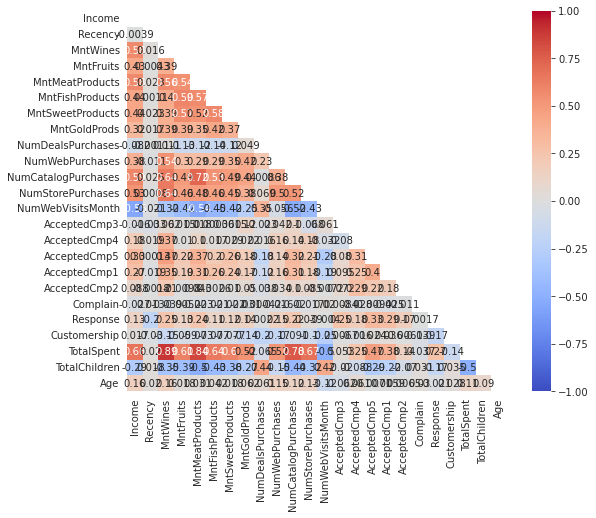

In [80]:
corr = dfslim_scaled.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## EDA and Plotting

['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customership', 'TotalSpent', 'TotalChildren', 'Age']


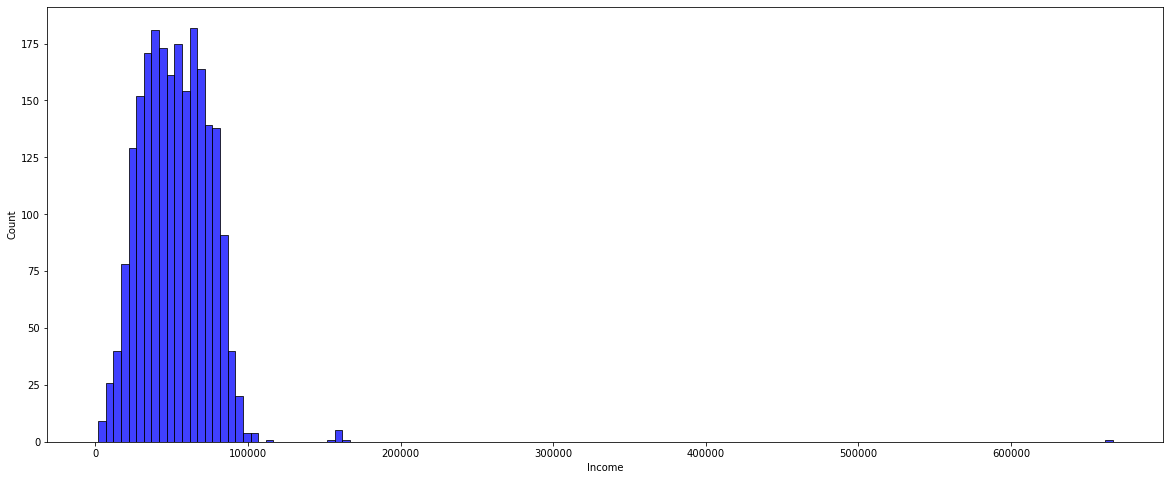

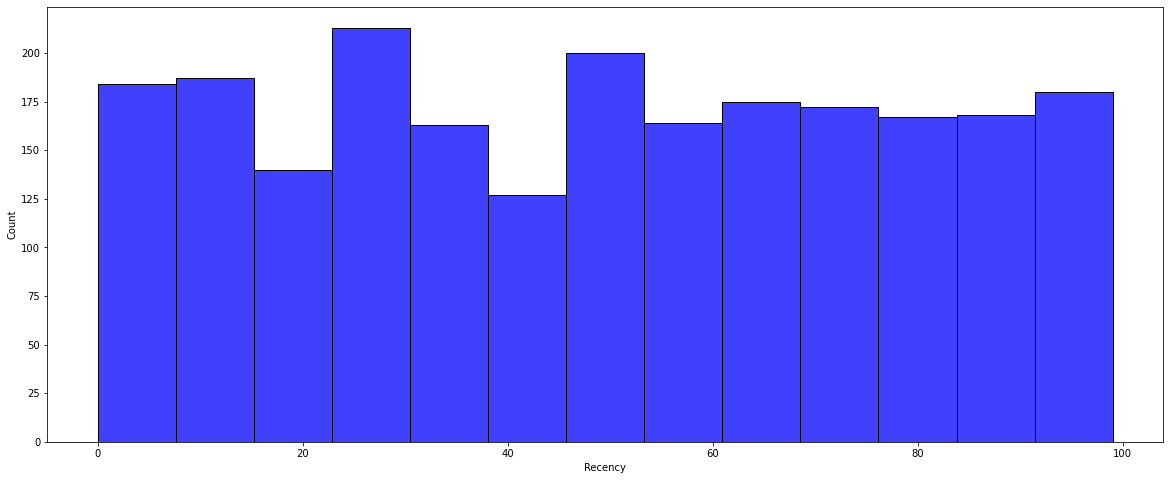

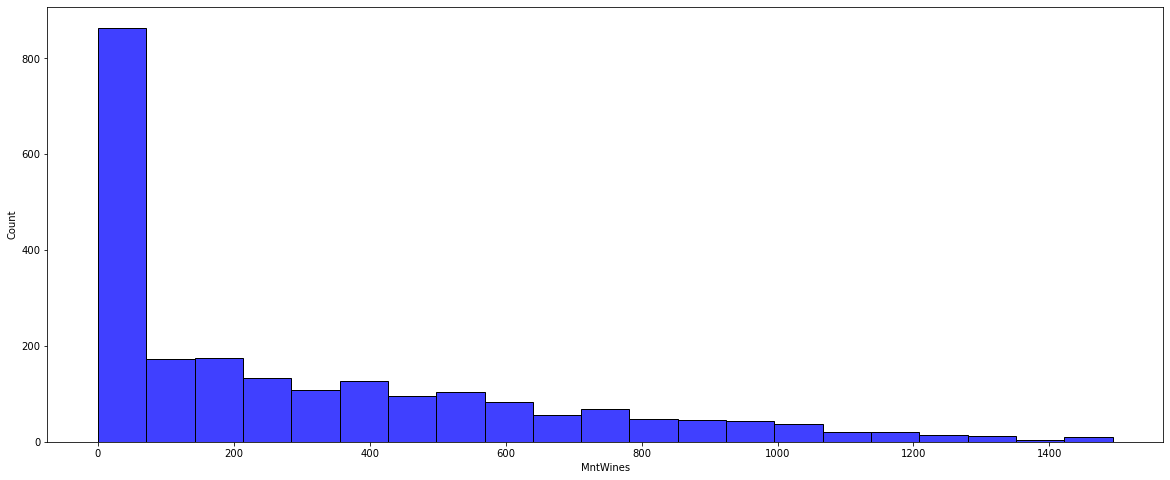

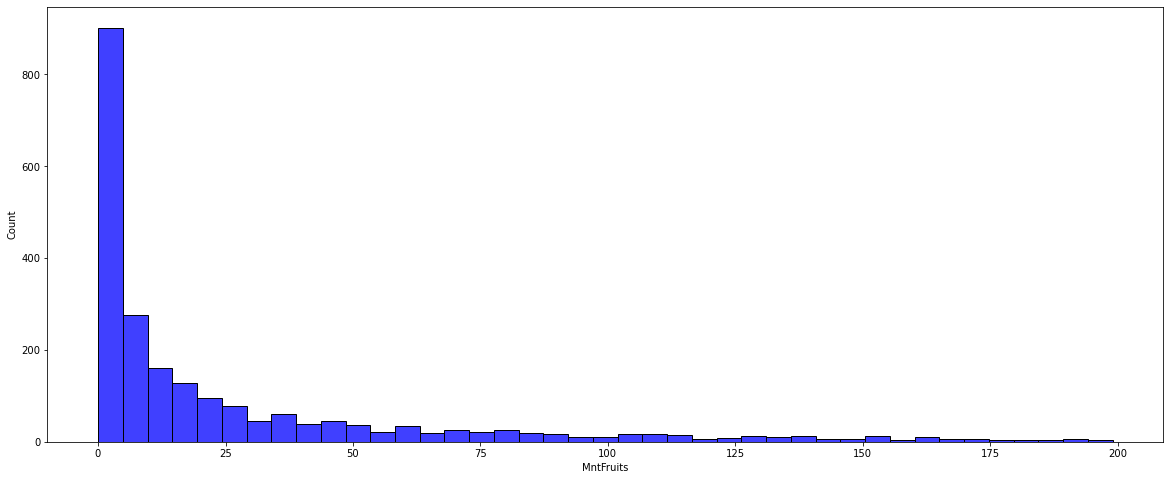

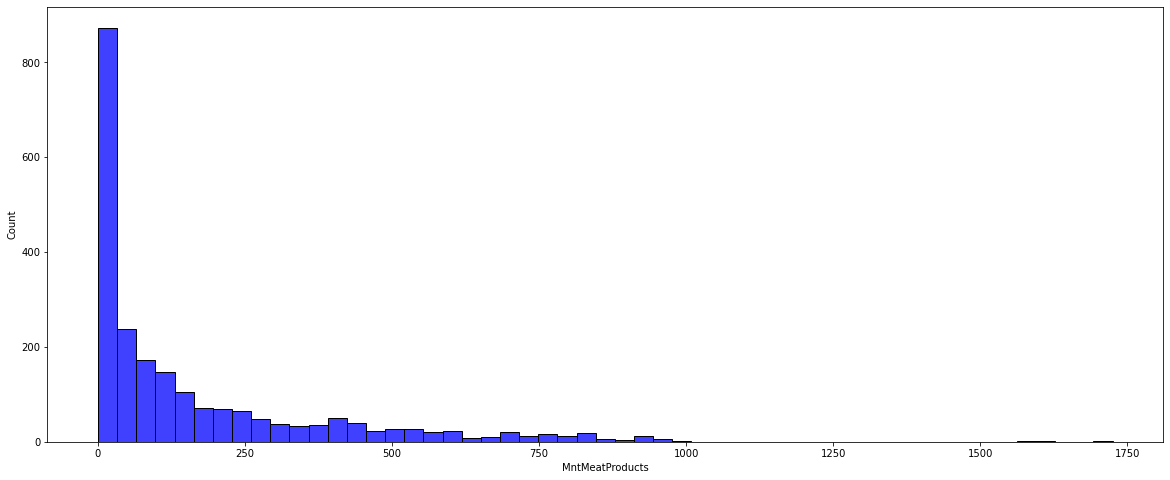

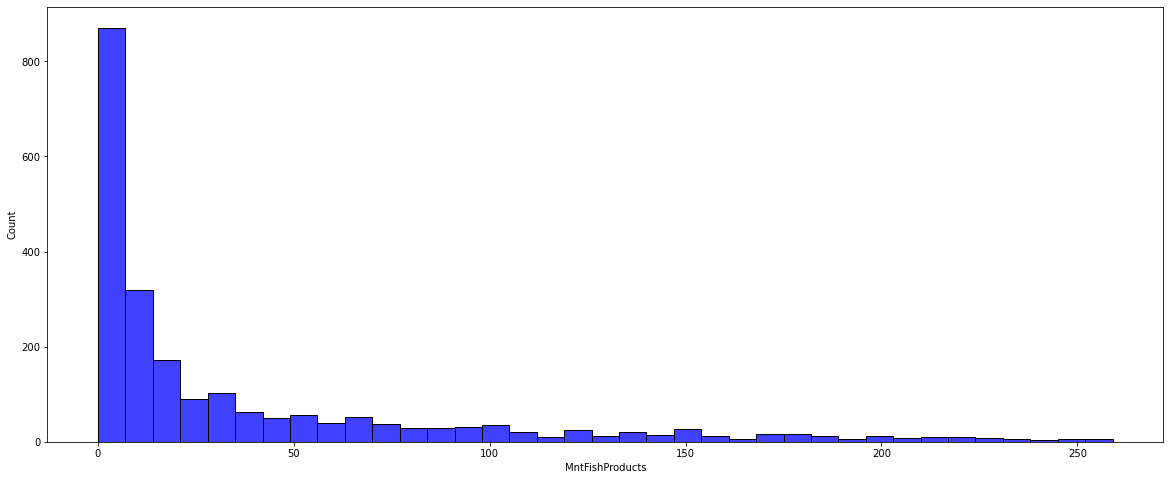

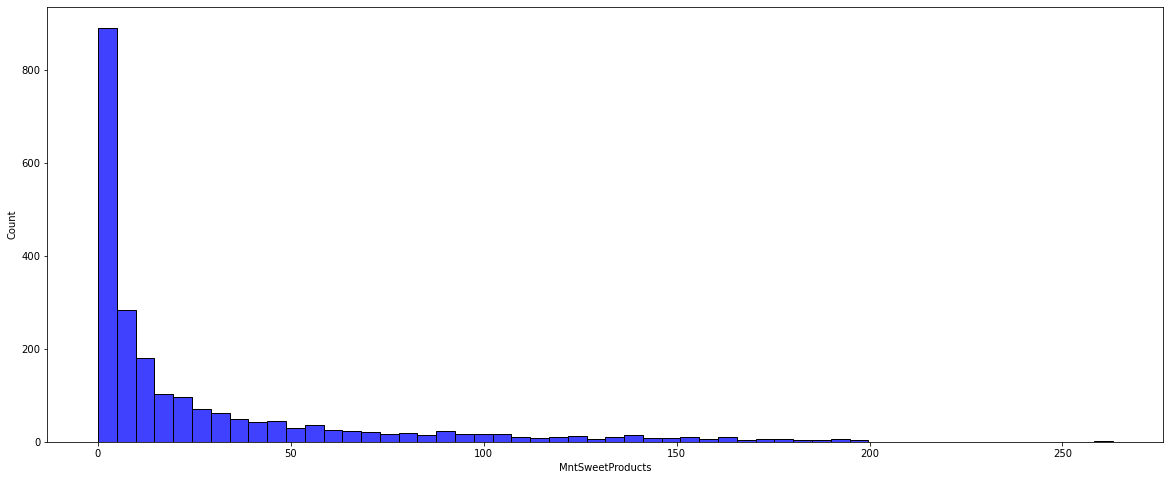

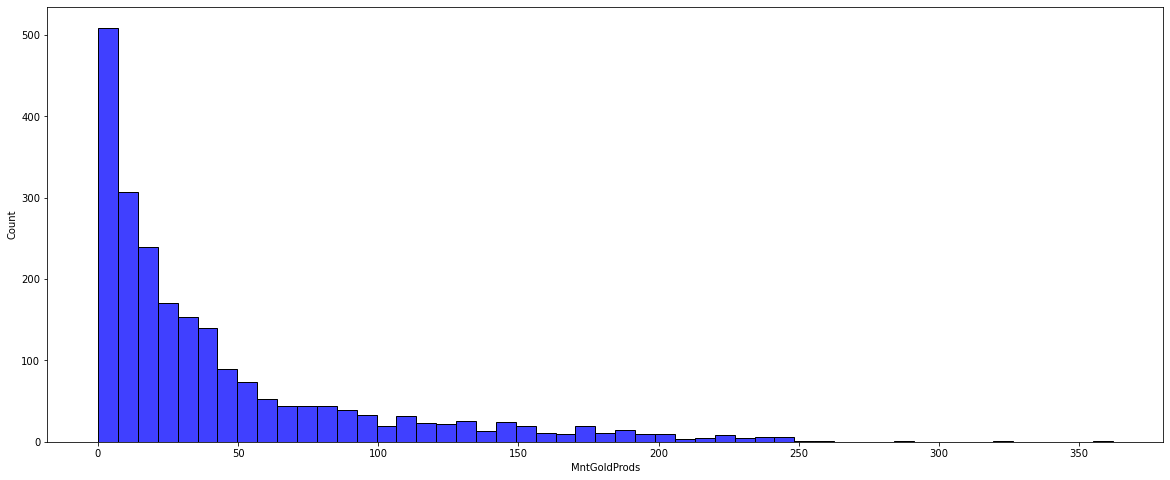

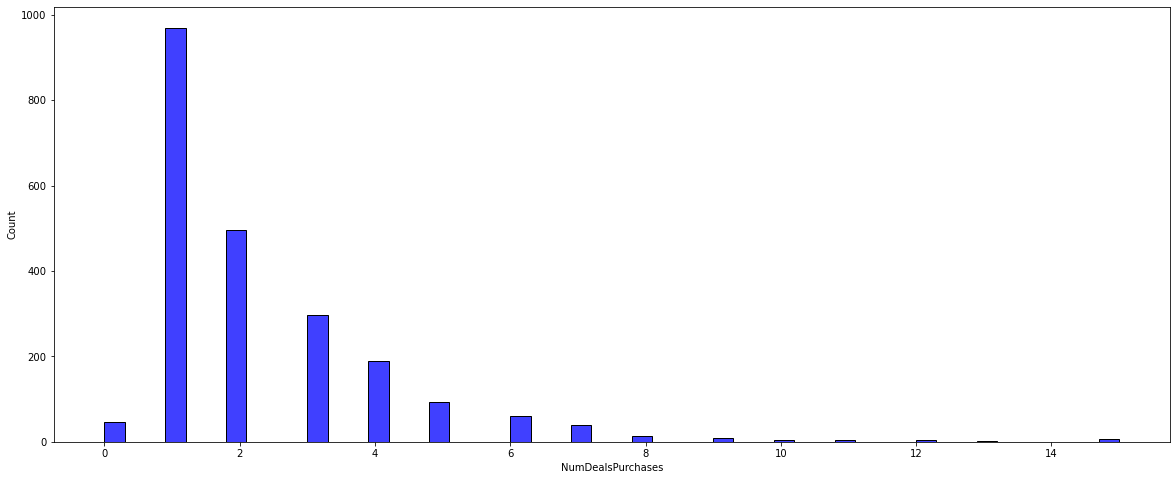

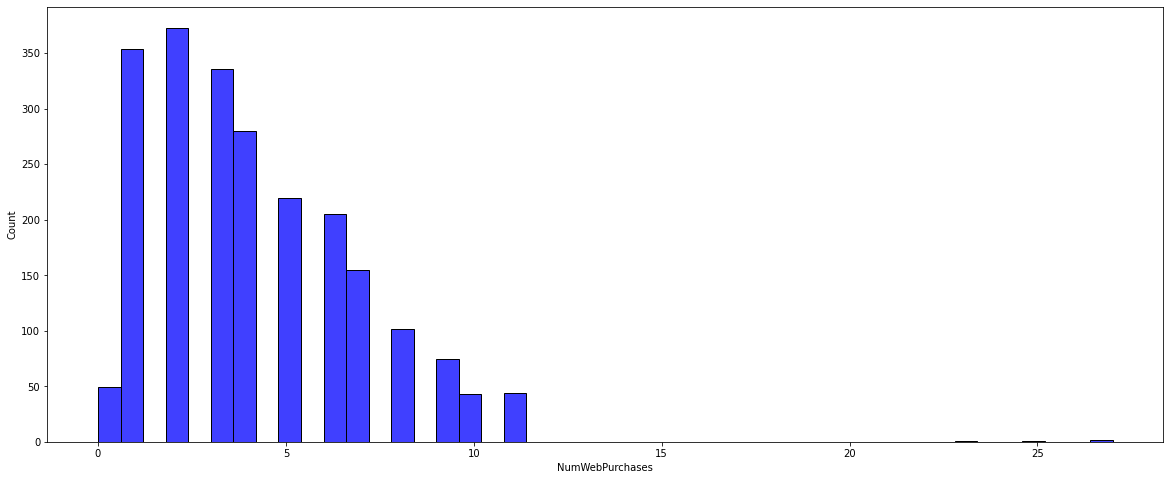

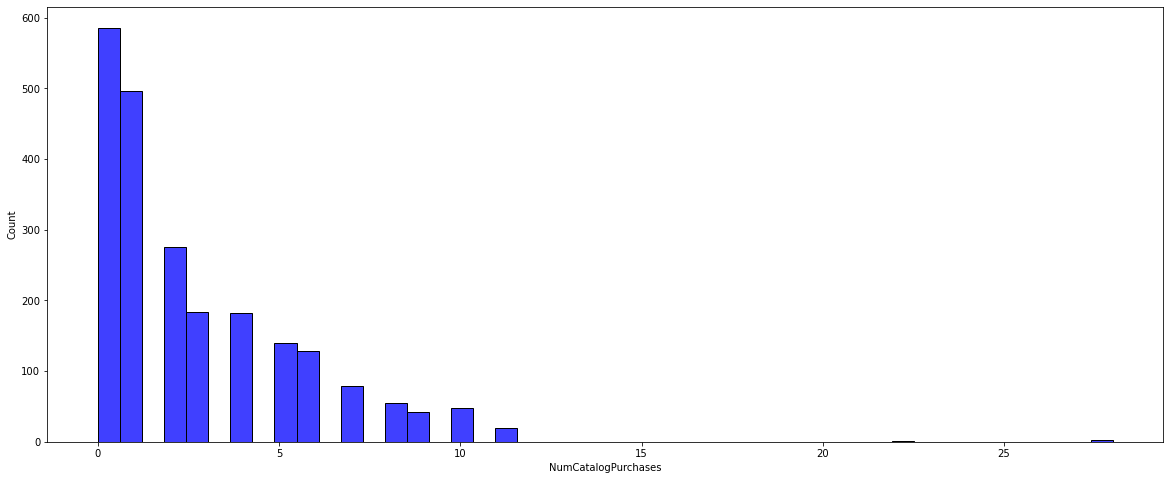

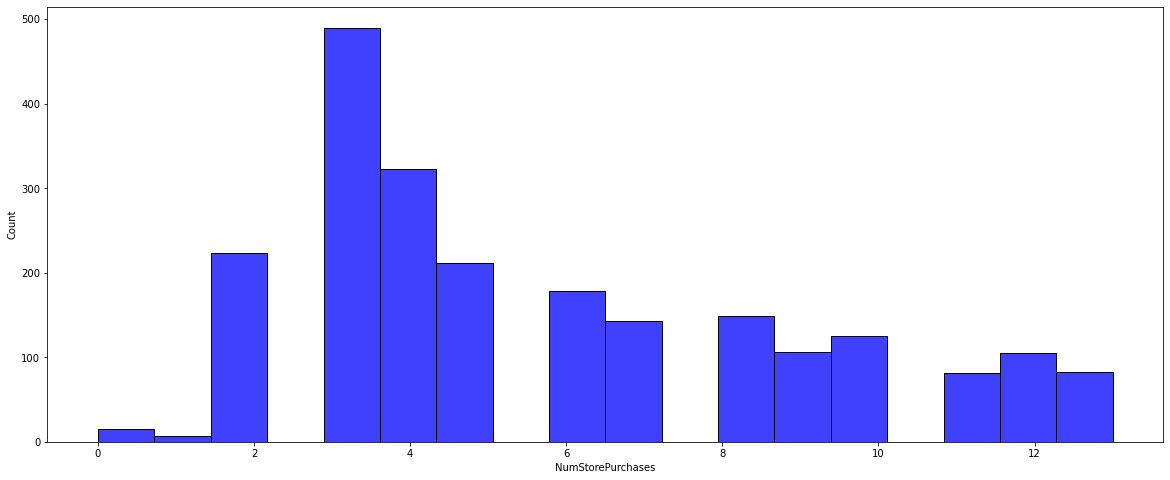

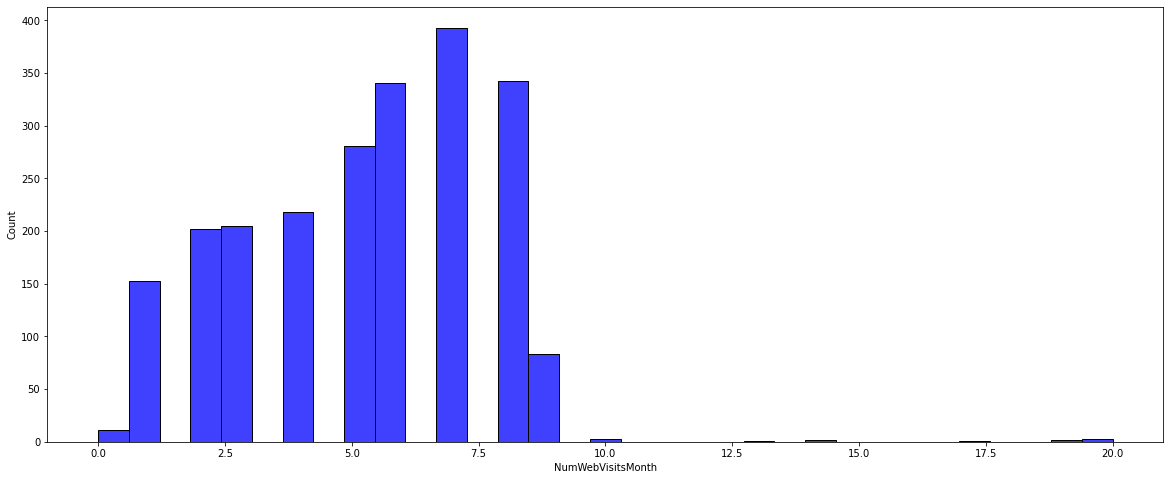

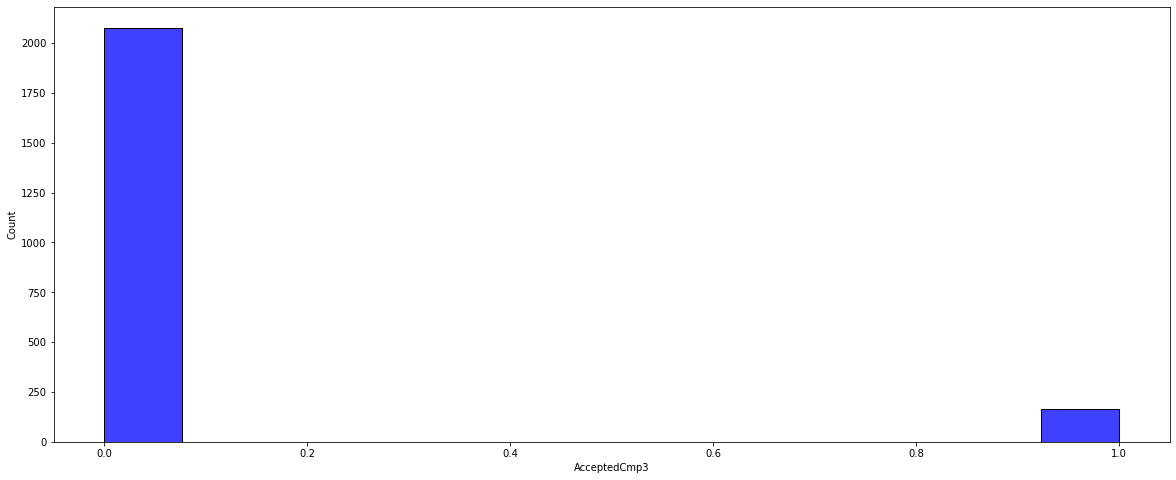

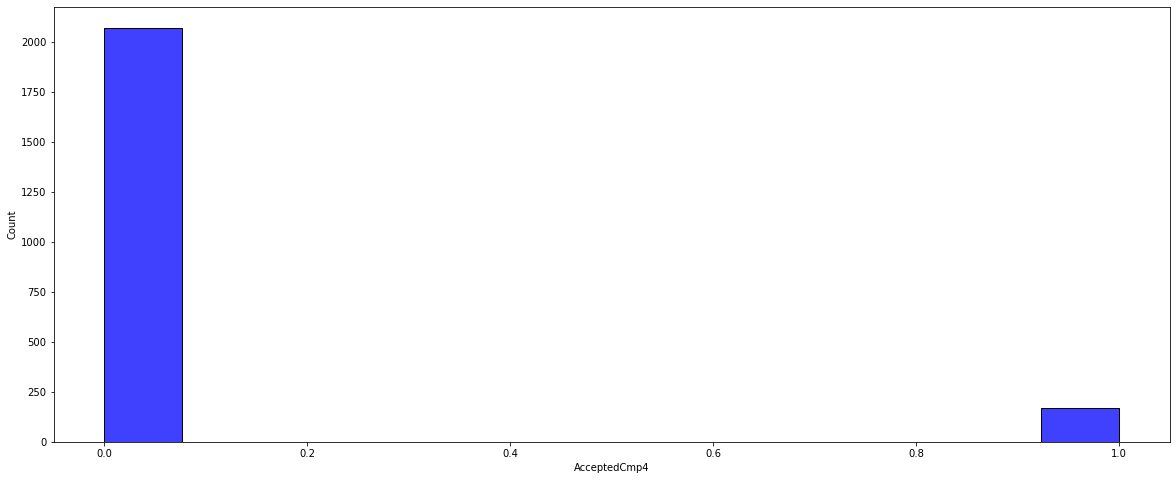

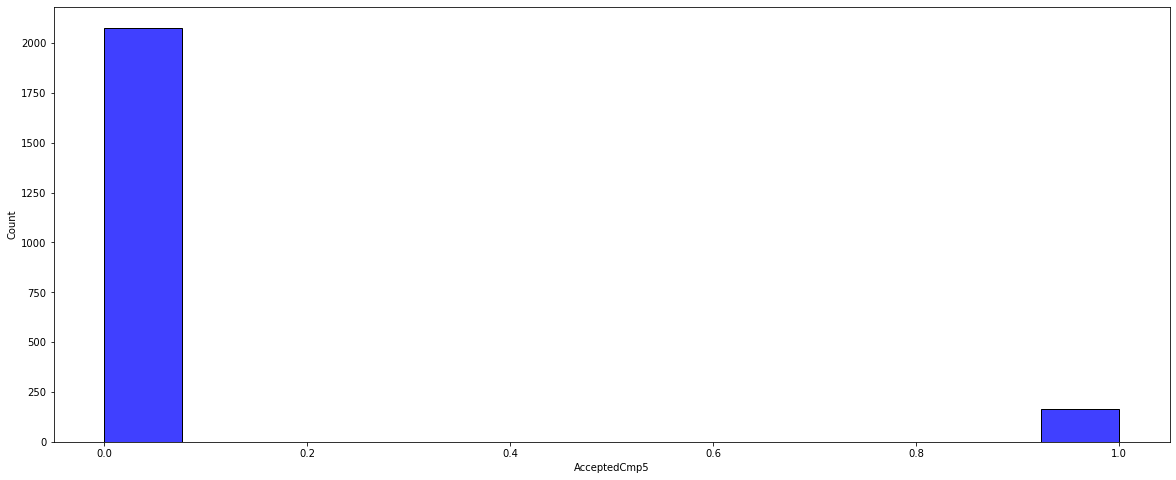

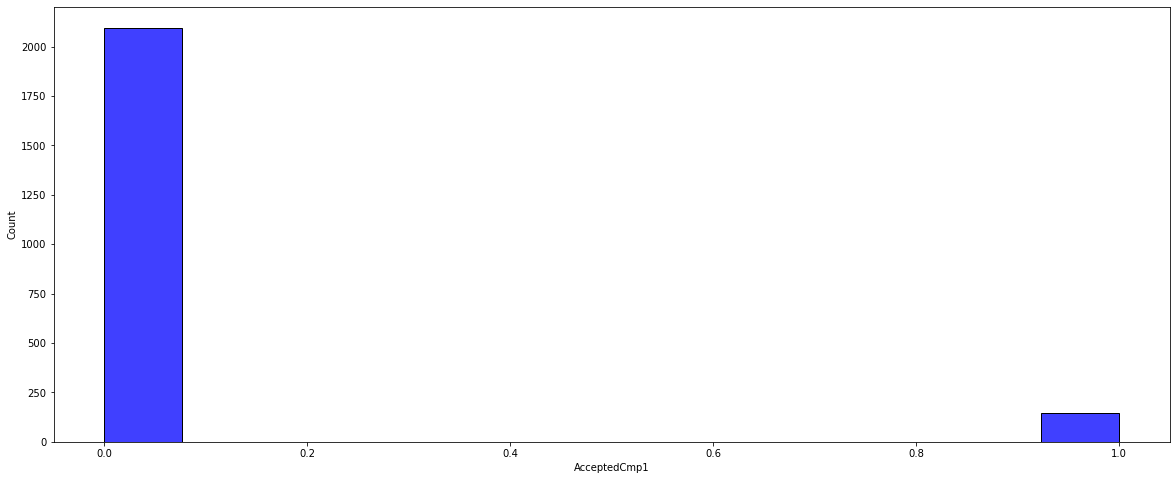

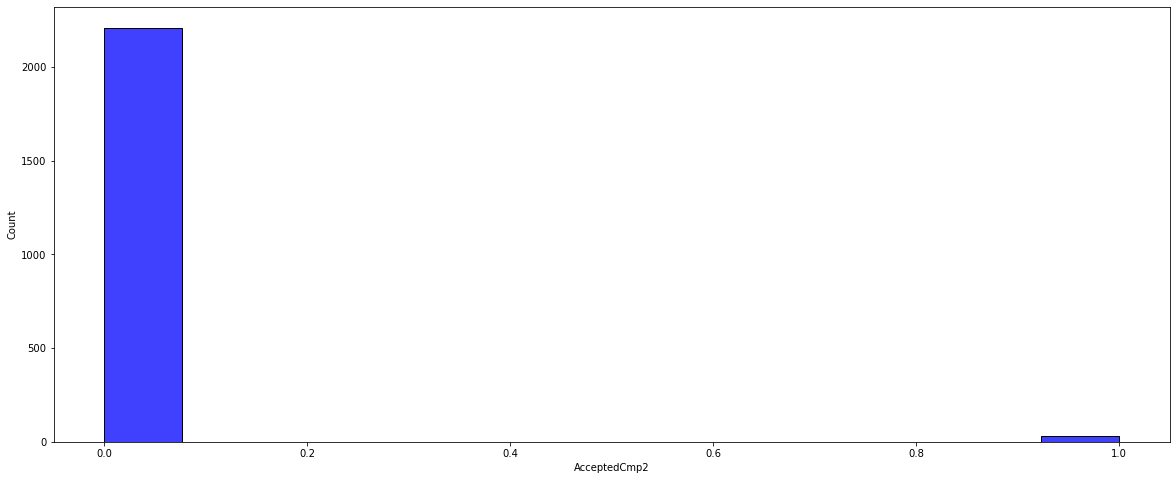

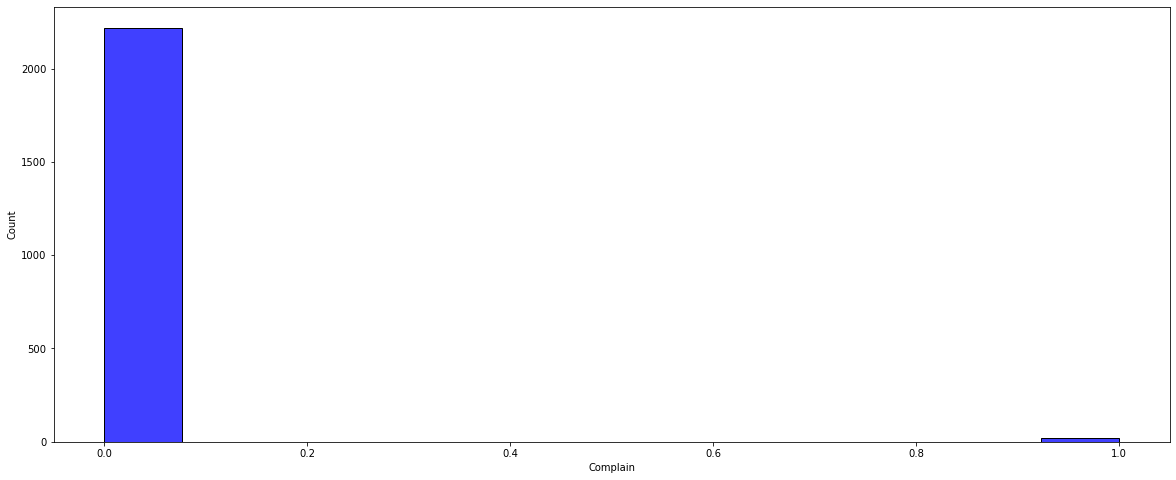

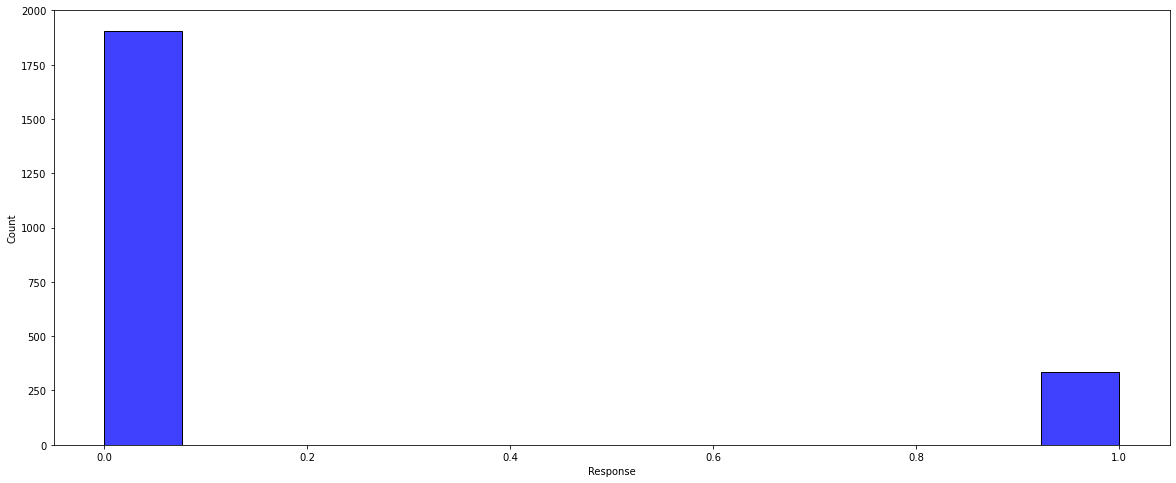

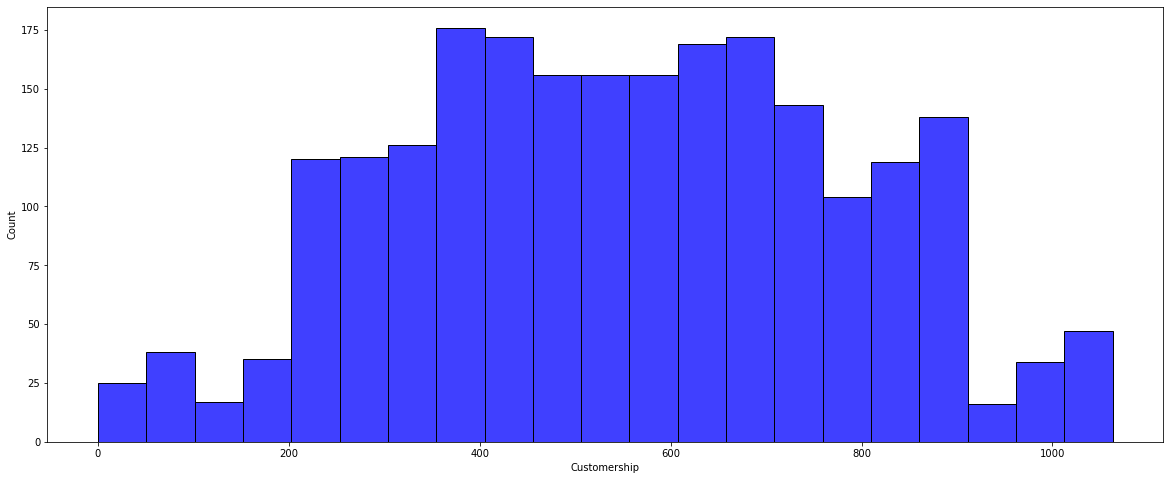

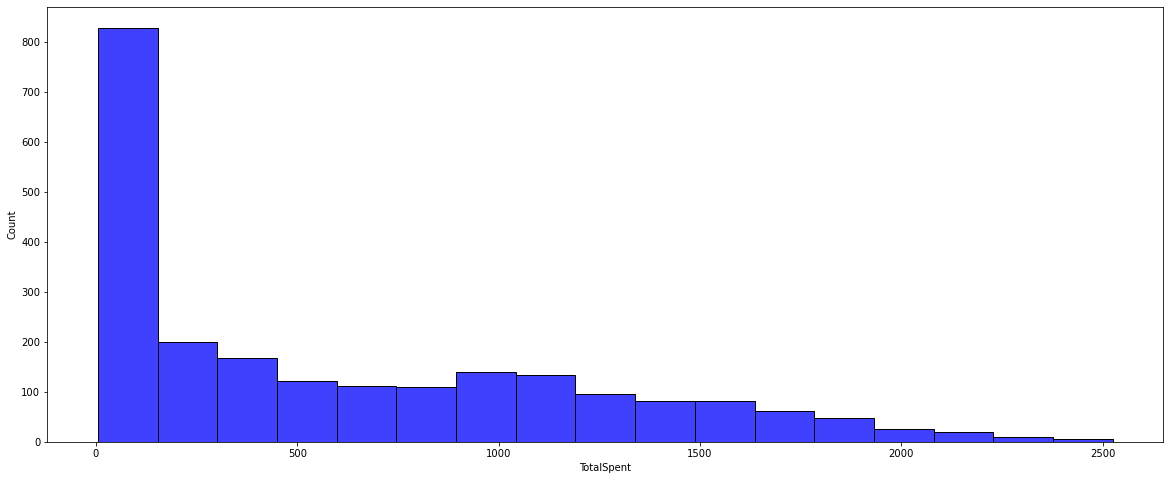

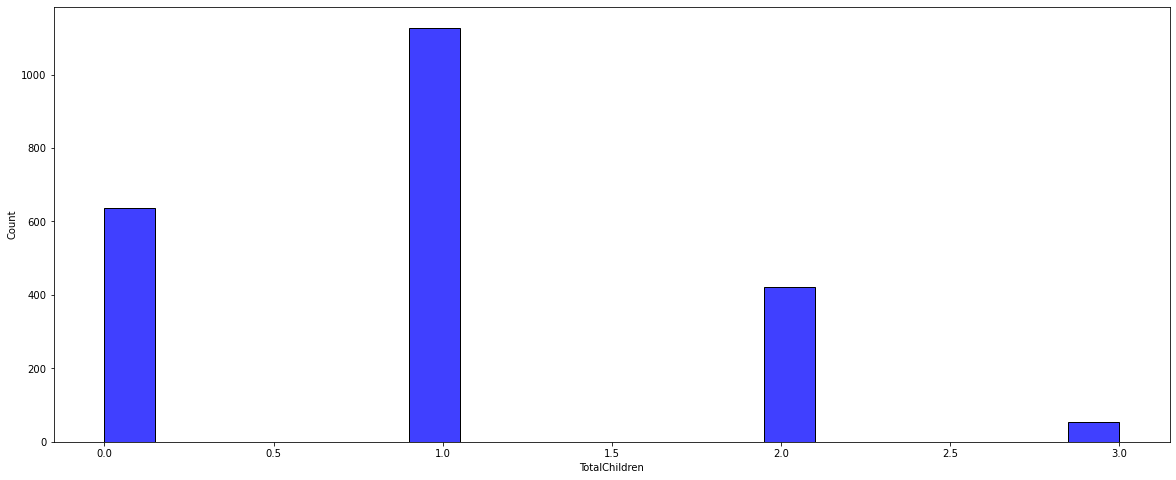

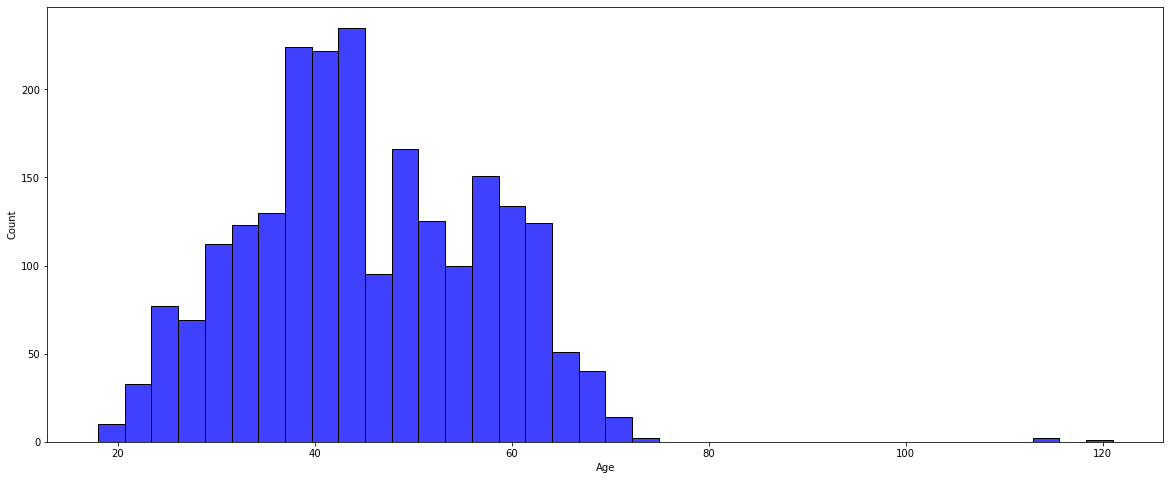

In [90]:
Num=[]
for col in dfslim.columns:
    if (dfslim[col].dtype==int) or (dfslim[col].dtype==float):
        Num.append(col)
print (Num)

for col in Num:
    plt.figure(figsize=(20,8))
    sns.histplot(df[col], color="b")
    plt.show()

In [95]:
Num #focuses on the numericals data

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Customership',
 'TotalSpent',
 'TotalChildren',
 'Age']

Because they have significant role in spending I will check age and income columns 

<Figure size 432x288 with 0 Axes>

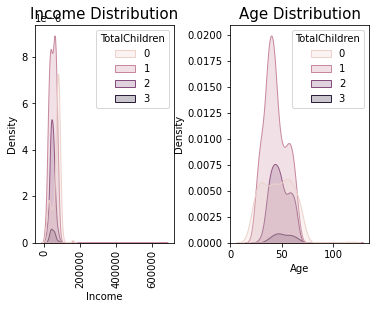

In [91]:
plt.subplots_adjust(wspace=0.4)
fig, axes = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4)
sns.kdeplot(dfslim["Income"],hue=dfslim["TotalChildren"],shade=True,ax=axes[0])
sns.kdeplot(data=dfslim,x="Age",hue="TotalChildren",shade=True,ax=axes[1])
axes[0].set_title('Income Distribution',fontsize=15)
axes[0].tick_params(axis='x', rotation=90)

axes[1].set_title('Age Distribution',fontsize=15)
fig.show()


- Most of our customers are 35+ 
- People with  children have higher income and spinding.
- We have outliers in age and income ,we should deal with them before clustering .

In [92]:
# new dataframe without Outliers
newdf=dfslim[dfslim["Income"]<600000]
newdf=dfslim[dfslim["Age"]< 80]

<Figure size 432x288 with 0 Axes>

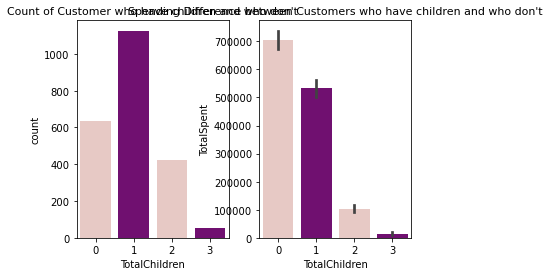

In [93]:
plt.subplots_adjust(wspace=0.7)
fig, axes = plt.subplots(ncols=2)
sns.countplot(newdf["TotalChildren"],ax=axes[0],palette=["#ECC5C0", "#800080"])
sns.barplot(newdf["TotalChildren"],df["TotalSpent"],estimator=sum,ax=axes[1],palette=["#ECC5C0", "#800080"])
axes[0].set_title("Count of Customer who have children and who don't",fontsize=11)
axes[1].set_title("Spending Difference between Customers who have children and who don't",fontsize=11)
fig.show()

The number of customers with at least one children is higher. \
But: most of our income comes from customers who have 0 children.

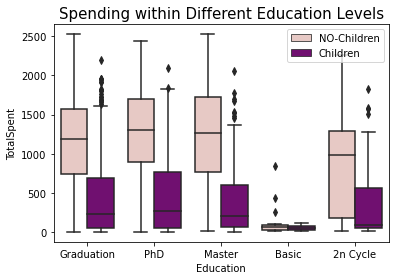

In [94]:
sns.boxplot(df["Education"],df["TotalSpent"],hue=df["Children"],palette=["#ECC5C0", "#800080"])
plt.legend(loc='upper right')
plt.title("Spending within Different Education Levels",fontsize=15)
fig.show()

- The average spending and the highest spending value are higher for customers  with PHD or master degree and don't have children.And in general spending  customers who don't have children have higher spending 

# Clustering

Dividing the data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.  \
Collecting objects on the basis of similarity and dissimilarity between them.

In [96]:
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## K-means
It divides a set of samples into clusters, each described by the mean of the samples in the cluster (centroids).  \
The K-means algorithm aims to choose centroids that minimise the inertia.



In [97]:
## scale the data
scaler = StandardScaler()
scaler.fit(newdf)

x = scaler.transform(newdf)
x = pd.DataFrame(x, columns = newdf.columns)
x

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customership,TotalSpent,TotalChildren,Age
0,0.235698,0.307272,0.983671,1.554623,1.680253,2.461700,1.475877,0.846061,0.348371,1.408080,...,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,2.386966,-1.975410,1.680649,-1.264618,1.017296
1,-0.235355,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,-0.729569,-0.169096,-1.110957,...,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,1.667521,-0.961838,1.395420,1.273722
2,0.773891,-0.798098,0.362570,0.572430,-0.176928,1.345050,-0.147000,-0.037829,-0.686563,1.408080,...,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,0.173317,0.282956,-1.264618,0.333495
3,-1.022094,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,-0.748784,-0.169096,-0.751094,...,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,1.925885,-0.918627,0.065401,-1.290534
4,0.241889,1.550812,-0.389289,0.421324,-0.216820,0.155177,-0.001667,-0.556634,1.383304,0.328493,...,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,0.823533,-0.305371,0.065401,-1.034108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.358914,-0.107242,1.203582,0.421324,0.066855,0.081954,2.202538,3.901246,-0.169096,1.767943,...,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,-0.123802,1.221953,0.065401,0.162544
2233,0.470386,0.238186,0.303134,-0.661606,-0.606872,-0.686886,-0.655663,-0.691139,2.418238,1.408080,...,-0.284036,-0.279414,3.812443,-0.11659,-0.09498,-0.418942,1.943110,-0.268808,2.725440,1.957523
2234,0.189488,1.447184,1.794966,0.547246,0.221989,-0.101103,-0.364998,-0.383699,-0.686563,-0.751094,...,3.520683,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,0.849369,1.055759,-1.264618,-1.034108
2235,0.679313,-1.419868,0.368513,0.093927,0.208692,0.777572,0.070999,0.327256,-0.169096,0.688356,...,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,0.845063,0.394307,0.065401,1.102771


In [98]:
## FIND BEST K - ELBOW METHOD
K = range(2, 21)
inertia = []

for k in K:
    #print("Training a K-Means model with {} clusters! ".format(k))
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

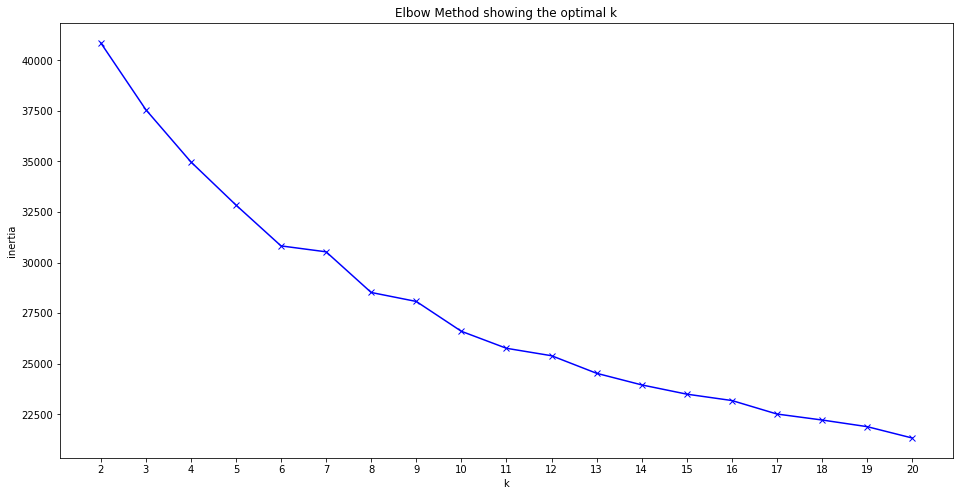

In [99]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')